In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [94]:
dt=pd.read_csv('titanic.csv')
#dt = sns.load_dataset("titanic")
dt.shape

(887, 8)

In [95]:
dt.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [96]:
#Verificar Nulos
dt.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

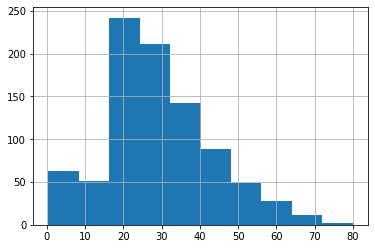

In [97]:
#Histograma de edad
dt.Age.hist()

In [98]:
#Descripcion de las columnas 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [99]:
#Cambio de tipo de dato de la edad de float a Entero
dt.Age=dt.Age.astype(int)
dt.Age

0      22
1      38
2      26
3      35
4      35
       ..
882    27
883    19
884     7
885    26
886    32
Name: Age, Length: 887, dtype: int32

In [100]:
#estadistica  
dt.Age.describe()

count    887.000000
mean      29.455468
std       14.129919
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [101]:
#las personas con 0 anos eran bebes??....murieron?
dt[dt['Age']==0]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
77,1,2,Master. Alden Gates Caldwell,male,0,0,2,29.0000
303,1,1,Master. Hudson Trevor Allison,male,0,1,2,151.5500
466,1,3,Miss. Helene Barbara Baclini,female,0,2,1,19.2583
641,1,3,Miss. Eugenie Baclini,female,0,2,1,19.2583
751,1,2,Master. Viljo Hamalainen,male,0,1,1,14.5000
799,1,3,Master. Assad Alexander Thomas,male,0,0,1,8.5167
827,1,2,Master. George Sibley Richards,male,0,1,1,18.7500


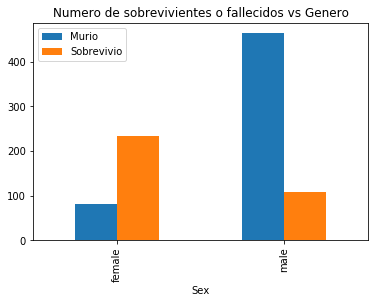

In [102]:
tab=pd.crosstab(index=dt['Sex'],columns=dt['Survived']).plot(kind='bar')
tab.legend(['Murio', 'Sobrevivio'])
plt.title('Numero de sobrevivientes o fallecidos vs Genero')
tab

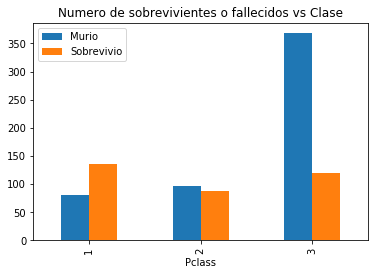

In [103]:
tab=pd.crosstab(index=dt['Pclass'],columns=dt['Survived']).plot(kind='bar')
tab.legend(['Murio', 'Sobrevivio'])
plt.title('Numero de sobrevivientes o fallecidos vs Clase')
tab

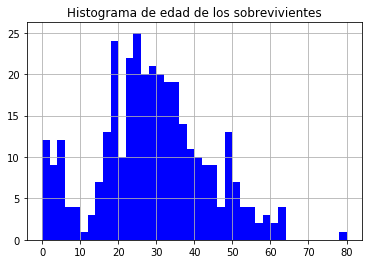

In [104]:
#Histograma  para ver la distribucion de la edad de los sobrevivientes
dt[dt['Survived']==1].hist(column='Age',  color='blue',bins=40)
plt.title('Histograma de edad de los sobrevivientes')
matplotlib.pyplot.show()

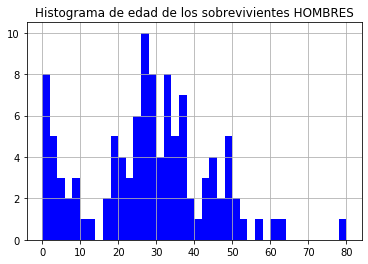

In [105]:
dt[((dt['Survived']==1) & (dt['Sex']=='male'))].hist(column='Age',  color='blue',bins=40)
plt.title('Histograma de edad de los sobrevivientes HOMBRES')
matplotlib.pyplot.show()

In [106]:
# De que clase eran los hombres que sobrevivieron
dt[((dt['Survived']==1)&(dt.Sex=='male'))].Pclass.value_counts()

3    47
1    45
2    17
Name: Pclass, dtype: int64

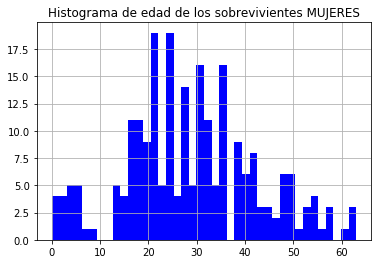

In [107]:
dt[((dt['Survived']==1) & (dt['Sex']=='female'))].hist(column='Age',  color='blue',bins=40)
plt.title('Histograma de edad de los sobrevivientes MUJERES')
matplotlib.pyplot.show()

In [108]:
tab=pd.crosstab(index=dt['Sex'],columns=dt['Survived'],margins=True)
tab

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


# Aplicacion del algoritmo de Regresion Logistica

In [109]:
pd.isnull(dt).sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [110]:
#camio los valores de Sex a numeros
dt.Sex.replace(['female','male'],[0,1],inplace=True)

In [111]:
dt.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35,0,0,8.0500


In [112]:
#Se agrupa las edades
bins = [-1, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
dt['Age'] = pd.cut(dt['Age'], bins, labels = names)

In [113]:
#Elimino columna que no me rsirve
dt.drop(['Name'],axis=1,inplace=True)


In [114]:
dt.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,4,1,0,7.2500
1,1,1,0,5,1,0,71.2833
2,1,3,0,5,0,0,7.9250
3,1,1,0,5,1,0,53.1000
4,0,3,1,5,0,0,8.0500


In [115]:
#Creacion de datos de entrenammiento y prueba
from sklearn.model_selection import train_test_split 

In [116]:
train, test = train_test_split(dt, test_size = 0.30)
train

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
810,0,3,1,5,0,0,8.0500
633,0,3,1,5,0,0,7.9250
464,0,1,1,6,0,0,26.5500
409,0,3,1,5,0,0,6.8583
747,1,3,1,1,0,1,12.4750
...,...,...,...,...,...,...,...
551,1,3,0,4,0,0,7.7750
96,1,1,1,4,0,1,63.3583
499,0,3,0,4,0,0,7.6292
639,0,3,0,1,3,2,27.9000


In [117]:
X = np.array(train.drop(['Survived'], 1))
y = np.array(train['Survived'])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.8245967741935484


In [130]:
ids = test.index
##Regresión logística
prediccion_logreg = logreg.predict(test.drop('Survived',1))
out_logreg = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head())

Predicción Regresión Logística:
   PassengerId  Survived
0          350         0
1          419         0
2          831         1
3          815         0
4          846         0


In [135]:
out_logreg['real_survived']=test.Survived.values

In [137]:
out_logreg.head(10)

,PassengerId,Survived,real_survived
0,350,0,0
1,419,0,0
2,831,1,1
3,815,0,0
4,846,0,0
5,727,0,0
6,447,0,0
7,77,1,1
8,779,0,0
9,478,0,0


In [140]:
out_logreg[out_logreg['Survived']!=out_logreg['real_survived']]

,PassengerId,Survived,real_survived
11,262,1,0
12,64,0,1
13,413,1,0
17,254,0,1
26,457,0,1
...,...,...,...
249,486,0,1
251,259,0,1
254,556,0,1
262,346,0,1


In [144]:
out_logreg['Acerto']=out_logreg['Survived']==out_logreg['real_survived']
out_logreg

,PassengerId,Survived,real_survived,Acerto
0,350,0,0,True
1,419,0,0,True
2,831,1,1,True
3,815,0,0,True
4,846,0,0,True
...,...,...,...,...
262,346,0,1,False
263,589,0,0,True
264,479,0,0,True
265,627,0,1,False


In [145]:
out_logreg.Acerto.value_counts()

True     202
False     65
Name: Acerto, dtype: int64

In [147]:
202/len(out_logreg)

0.7565543071161048